# Distribución Gaussiana

In [9]:
from scipy.stats import norm

## Importamos librerías

In [23]:
import numpy as np
from probability_helper import plot_normalized_histogram_sorted
from matplotlib import pyplot as plt

In [24]:
gran_danes_pesos = np.load('data/gran_danes_pesos.npy')
gran_danes_pesos[:20]

array([67.36, 54.65, 62.26, 64.9 , 71.34, 65.19, 66.32, 70.06, 60.59,
       69.56, 56.42, 64.91, 57.02, 64.74, 54.25, 55.09, 67.24, 84.08,
       54.41, 47.  ])

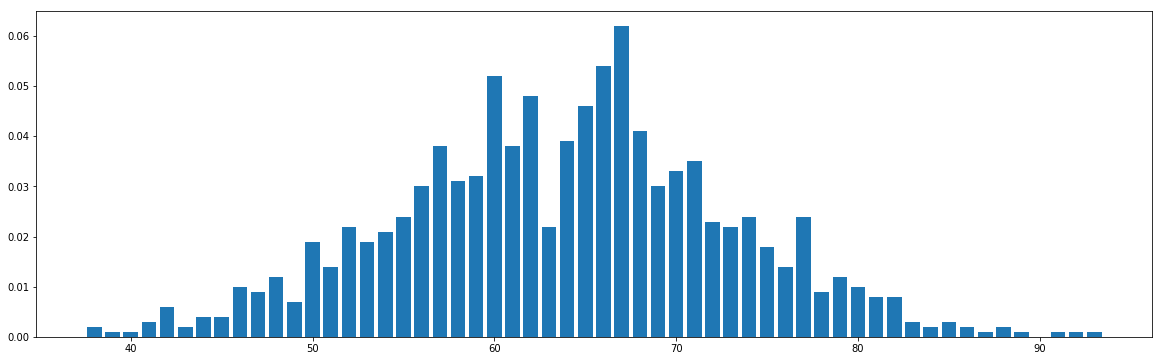

In [16]:
gran_danes_pesos_rounded = np.round(gran_danes_pesos)
espacio_muestral_2, probs_gran_danes_pesos_2 = plot_normalized_histogram_sorted(gran_danes_pesos_rounded)

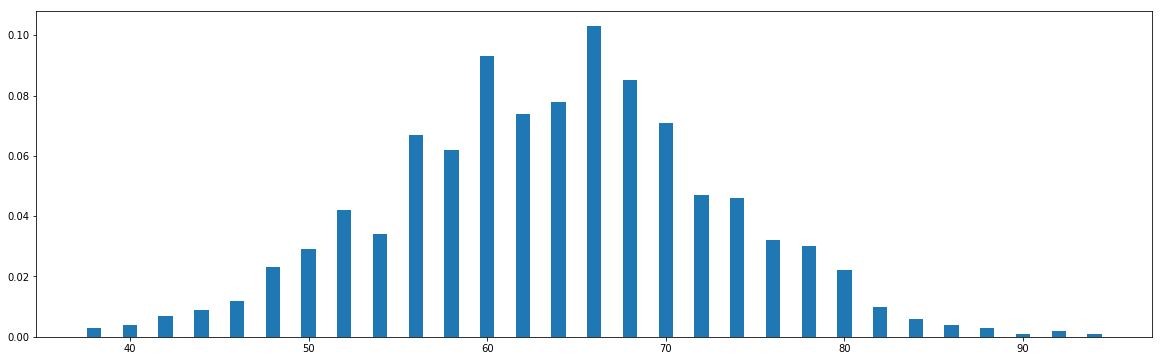

In [18]:
gran_danes_pesos_rounded = np.round(gran_danes_pesos/2)*2
espacio_muestral_3, probs_gran_danes_pesos_3 = plot_normalized_histogram_sorted(gran_danes_pesos_rounded)

## Modelo Gaussiano

$\large p(x) = \frac{1}{\sqrt{2\pi\sigma_x^2}}e^{-\frac{(x-\mu_x)^2}{2\sigma_x}}$

La probabilidad es el area bajo la curva

### Estimamos media y desvio estandar

In [10]:
media_pesos = gran_danes_pesos.mean()
std_pesos = gran_danes_pesos.std()
print(media_pesos, std_pesos)

63.744769999999995 9.164246283634023


In [11]:
rango_pesos = np.linspace(espacio_muestral_2[0], espacio_muestral_2[-1], 100)
pdf_pesos = norm.pdf(rango_pesos, media_pesos, std_pesos)

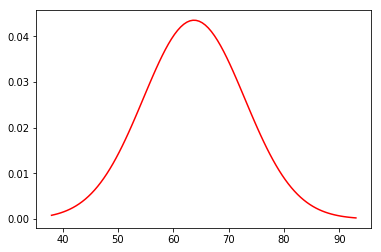

In [12]:
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.show()

### Comparado contra nuestro primer histograma

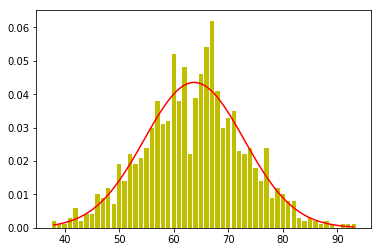

In [13]:
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.bar(espacio_muestral_2, probs_gran_danes_pesos_2, color='y')
plt.show()

### Comparado contra nuestro segundo histograma

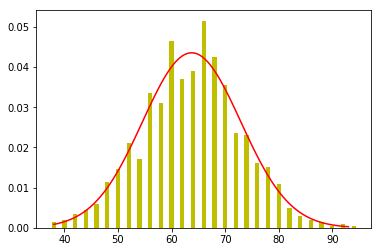

In [19]:
plt.plot(rango_pesos, pdf_pesos, color='r')
plt.bar(espacio_muestral_3, probs_gran_danes_pesos_3/2, color='y')
plt.show()

Por que dividimos por 2?

La distribución Gaussiana es continua mientras que nuestros histogramas son discretos.

Las distribuciones continuas miden densidad de probabildad, es decir, probabilidad por unidad de peso en este caso.

En el ejemplo, el segundo histograma esta midiendo la probabilidad en 2Kg, por eso dividimos por 2

### Modelo

**Tipo de modelo**: Gaussiano  
**Cantidad de parámetros estimados**: 2 (Media y Desvio)  
**Espacio muestral**: Continuo

### Métodos estadísticos paramétricos vs no paramétricos
Se suele hacer esta distinción en estadistica refiriendose a paramétricos cuando podemos represeantar una distribución con parámetros, como por ejemplo la media y la varianza
- El histograma es una representación no paramétrica de la estimación de la distribución de probabilidad
- Existen otras formas como KDE (Kernel Density Estimation)

### Modelo generador Gaussiano:

In [20]:
print(media_pesos, std_pesos)

63.744769999999995 9.164246283634023


In [21]:
N = 10
np.random.normal(63.74477, 9.16424628363, N)

array([66.1124844 , 61.79447436, 63.08171189, 69.62602533, 79.77983083,
       60.38589384, 64.15354398, 59.8836654 , 55.40963665, 62.25885813])

### Lo comparamos con el de Histograma

In [22]:
np.random.choice([ 38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,  59.,
        60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,  69.,  70.,
        71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  91.,  92.,  93.],  
                 size = 6000, 
                 p = [ 0.002,  0.001,  0.001,  0.003,  0.006,  0.002,  0.004,  0.004,
        0.01 ,  0.009,  0.012,  0.007,  0.019,  0.014,  0.022,  0.019,
        0.021,  0.024,  0.03 ,  0.038,  0.031,  0.032,  0.052,  0.038,
        0.048,  0.022,  0.039,  0.046,  0.054,  0.062,  0.041,  0.03 ,
        0.033,  0.035,  0.023,  0.022,  0.024,  0.018,  0.014,  0.024,
        0.009,  0.012,  0.01 ,  0.008,  0.008,  0.003,  0.002,  0.003,
        0.002,  0.001,  0.002,  0.001,  0.001,  0.001,  0.001], 
                 replace=True)

array([72., 72., 75., ..., 81., 74., 60.])

## Ventajas del modelo Gaussiano:
- Reduzco la cantidad de parámetros
- Generalización
- Espacio muestral continuo en contraposición con el discreto de los histogramas
- Teorema central del límite

Es mas preciso el modelo Gaussiano o el de histograma?

Que significa preciso? La precisión puede ser el enemigo